<a href="https://colab.research.google.com/github/diegovianagomes/mestrado/blob/main/pln_exerc_01_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso: Redes Neurais para Processamento de Linguagem Natural

Prof. [Denilson Alves Pereira](https://sites.google.com/ufla.br/denilsonpereira) <br>
Departamento de Ciência da Computação (DCC) <br>
Instituto de Ciências Exatas e Tecnológicas (ICET) <br>
Universidade Federal de Lavras (UFLA)

# Atividade Prática 01

**Instruções:**
1. Siga os passos indicados em cada célula abaixo para completar a atividade.
2. Você deve inserir código somente entre as linhas marcadas com **INICIE O CÓDIGO AQUI** e **TERMINE O CÓDIGO AQUI**. Há uma indicação de quantas linhas de código são necessárias.
3. Em alguns pontos, confira o resultado esperado conforme marcado com **SAÍDA ESPERADA**.

**Tempo estimado para execução**: 2,0 horas

Versão: Maio, 2024

## O Problema a ser Resolvido

O objetivo da atividade é elaborar modelos baseados em Redes Neurais Recorrentes para a tarefa de classificação de textos. Classificação de texto é uma tarefa de PLN que atribui um rótulo (ou classe) a um texto. <br>

Nesta atividade, você vai usar um dataset de mensagens de texto, e o seu modelo vai predizer aquelas que são *spam* e as que não são *spam* (*ham*). Este é um problema de classificação binária. <br>

Você vai praticar as seguintes habilidades:
- Preprocessar os dados
- Usar as bibliotecas de Redes Neurais Recorrentes
- Configurar arquiteturas de redes neurais usando camadas LSTM e GRU
- Treinar modelos para classificação das mensagens
- Avaliar os modelos treinados

Referências: <br>
Código adaptado de:<br>
https://nzlul.medium.com/the-classification-of-text-messages-using-lstm-bi-lstm-and-gru-f79b207f90ad<br>
Documentação da API Keras para Camadas Recorrentes:<br>
https://keras.io/api/layers/recurrent_layers/<br>
https://www.tensorflow.org/guide/keras/working_with_rnns<br>

## Pacotes

In [1]:
# Load, explore and plot data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# Train test split
from sklearn.model_selection import train_test_split
# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Pré-Processamento dos Dados

### Dataset

Base de dados de mensagens SMS de celulares, publicamente disponível na UCL datasets (https://archive.ics.uci.edu/dataset/228/sms+spam+collection). Pode também ser baixada de https://raw.githubusercontent.com/kenneth-lee-ch/SMS-Spam-Classification/master/spam.csv<br>
O dataset contém 5.574 mensagens rotuladas como *spam* ou não *spam* (*ham*).

A biblioteca Pandas foi usada para ler e manipular o dataset.

In [4]:
# read the dataset
df = pd.read_csv('/content/drive/MyDrive/03_MESTRADO/REDES NEURAIS/INTRODUÇÃO À REDES NEURAIS/notebooks-atividades-praticas/datasets/spam.csv', encoding='ISO-8859-1')
# rename the columns
df = df[['v1','v2']]
df.rename(columns={'v1':'label', 'v2':'message'}, inplace=True)
# show the first instances
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Estatísticas sobre os Dados

Exibe um sumário das estatísticas para melhor entender os dados

In [5]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

### Nuvem de Palavras

Visualiza as palavras mais frequentes em cada classe usando uma nuvem de palavras

In [8]:
ham_msg  = df.loc[df['label'] == 'ham']
spam_msg = df.loc[df['label'] == 'spam']

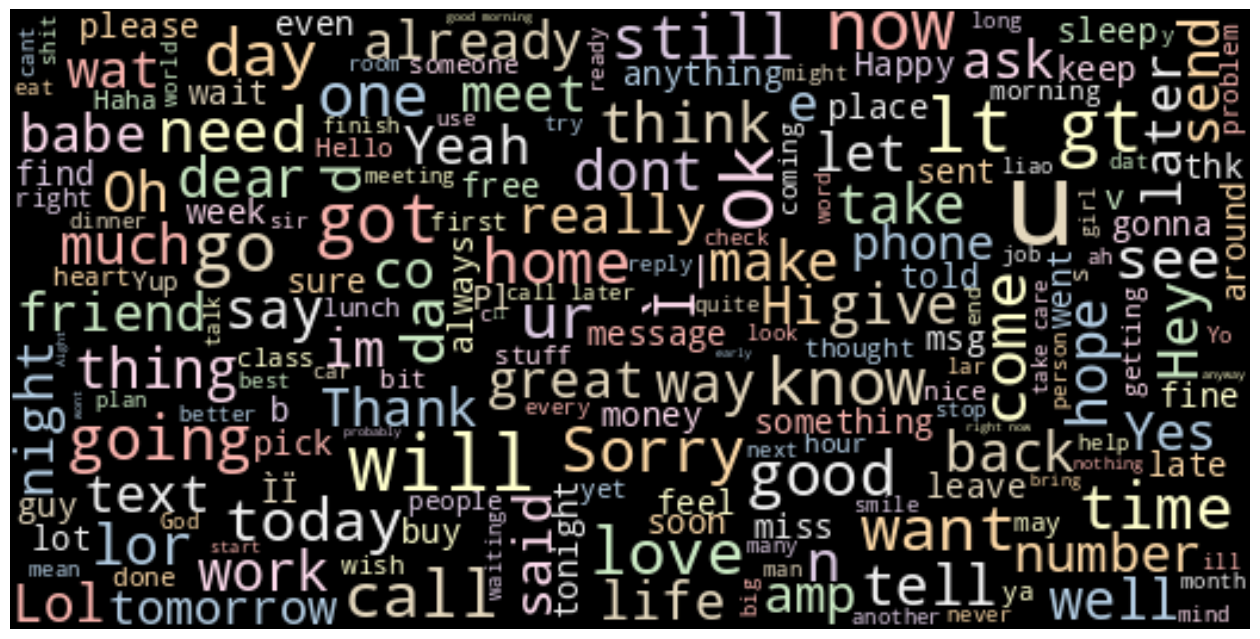

In [9]:
# Nuvem de palavras da classe 'ham'
ham_msg_text = ' '.join(ham_msg['message'])
ham_msg_cloud = WordCloud(width =520, height =260, stopwords = STOPWORDS, max_font_size = 50, background_color = "black", colormap = 'Pastel1').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.show()

Palavras mais frequentes da classe 'ham', de acordo com a nuvem de palavras: now, will, ok, today, Sorry etc.

Adicione abaixo um trecho de código para gerar a nuvem de palavras para os textos da classe 'spam'.<br>
Depois, verifique as palavras mais frequentes da classe.

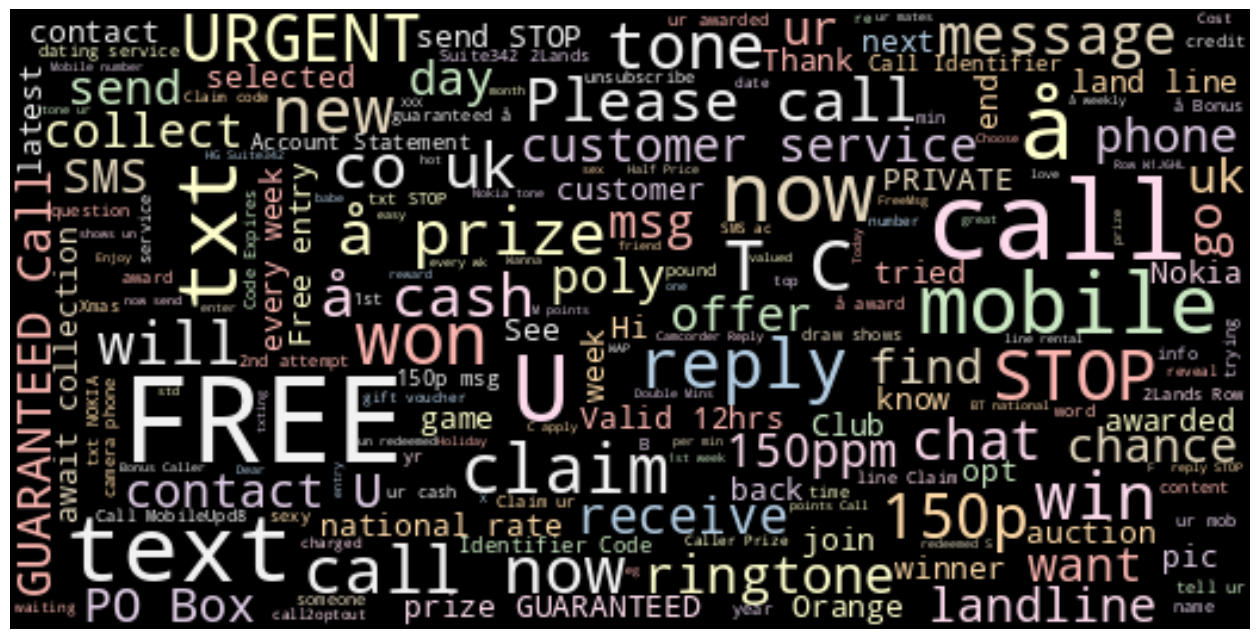

In [10]:
# Nuvem de palavras da classe 'spam'
### INICIE O CÓDIGO AQUI ### (6 ou mais linhas de código)
# Nuvem de palavras da classe 'spam'
spam_msg_text = ' '.join(spam_msg['message'])
spam_msg_cloud = WordCloud(width =520, height =260, stopwords = STOPWORDS, max_font_size = 50, background_color = "black", colormap = 'Pastel1').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.show()


### TERMINE O CÓDIGO AQUI ###

Palavras mais frequentes da classe 'spam', de acordo com a nuvem de palavras: FREE, call, URGENT, mobile, etc

### Balanceamento dos Dados

Como veremos abaixo, o dataset está muito desbalanceado. Existem muito mais mensagens na classe 'ham' do que na classe 'spam'.<br>
O treinamento de modelos de aprendizagem de máquina a partir de datasets muito desbalanceados pode gerar um viés, levando o modelo a predizer a classe mais frequente.<br>

Existem algumas abordagens para tratar o problema de dados desbalanceados, dentre elas: escolher métricas de avaliação mais apropriadas, resampling (oversampling and undersampling), Synthetic Minority Oversampling Technique (SMOTE), BalancedBaggingClassifier, Threshold moving.<br>

Neste notebook, nós usaremos o método undersampling (subamostragem) para manusear os dados desbalanceados. A técnica consiste em subamostrar a classe majoritária de forma aleatória e uniforme, escolhendo, aproximadamente, o mesmo número de instâncias da classe minoritária. Isso pode potenciamente conduzir a perda de informação, mas se os exemplos da classe majoritária estiverem próximos uns aos outros, esse método pode levar a bons resultados.

Text(0.5, 1.0, 'The distribution of ham and spam messages')

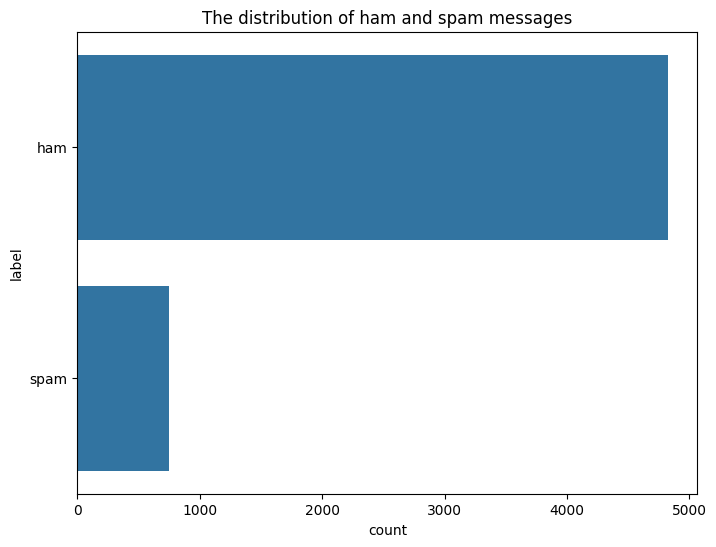

In [11]:
# Distribuição das mensagens em 'ham' e 'spam'
plt.figure(figsize=(8,6))
sns.countplot(df.label)
plt.title('The distribution of ham and spam messages')

In [12]:
# downsample the ham msg
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)

In [13]:
msg_df = pd.concat([ham_msg_df, spam_msg])
msg_df.head()

,label,message
3234,ham,"Yes, princess. Toledo."
3804,ham,Dude while were makin those weirdy brownies my...
2701,ham,"Hiya, sorry didn't hav signal. I haven't seen ..."
2822,ham,Then u ask darren go n pick u lor... But i oso...
5161,ham,Lol no. I just need to cash in my nitros. Hurr...


In [14]:
msg_df.tail()

,label,message
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...


Text(0.5, 1.0, 'The distribution of ham and spam messages')

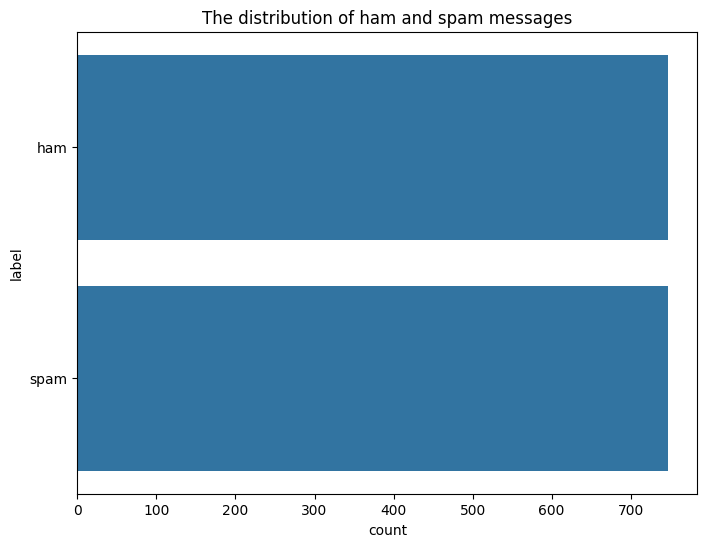

In [15]:
# Nova distribuição
plt.figure(figsize=(8,6))
sns.countplot(msg_df.label)
plt.title('The distribution of ham and spam messages')

### Pré-processamento do Texto

Cria duas colunas no *dataframe*: uma para armazenar o comprimento de cada mensagem de texto e outra para armazenar o rótulo da classe convertido para um valor numérico (0: ham, 1: spam).

In [16]:
# Get length column for each text
msg_df['text_length'] = msg_df['message'].apply(len)
# Get the converted numeric label of the data
msg_df['msg_type'] = msg_df['label'].map({'ham':0, 'spam':1})
msg_df.head()

,label,message,text_length,msg_type
3234,ham,"Yes, princess. Toledo.",22,0
3804,ham,Dude while were makin those weirdy brownies my...,88,0
2701,ham,"Hiya, sorry didn't hav signal. I haven't seen ...",169,0
2822,ham,Then u ask darren go n pick u lor... But i oso...,74,0
5161,ham,Lol no. I just need to cash in my nitros. Hurr...,75,0


In [17]:
msg_df.tail()

,label,message,text_length,msg_type
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,1
5567,spam,This is the 2nd time we have tried 2 contact u...,161,1


### Divisão dos Dados em Treino e Teste

Os dados são divididos, aletatoriamente, em 80% para treino e 20% para teste.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(msg_df['message'], msg_df['msg_type'], test_size=0.2, random_state=434)

In [19]:
X_train.tail()

,message
1364,Hey i will be really pretty late... You want t...
1121,Do you want 750 anytime any network mins 150 t...
4458,Welcome to UK-mobile-date this msg is FREE giv...
2900,Ur cash-balance is currently 500 pounds - to m...
5269,"If you don't, your prize will go to another cu..."


In [20]:
y_train.tail()

,msg_type
1364,0
1121,1
4458,1
2900,1
5269,1


### Tokenização

Os textos das mensagens precisam ser convertidos para uma representação numérica, para que o modelo possa entendê-los.

A API Tokenizer do TensorFlow divide as sentenças em palavras e as codifica em números inteiros.

O Tokenizer executará os seguintes passos de pré-processamento: tokeniza a nível de palavras, remove os termos de pontuação, converte todas as palavras para minúsculas, converte todas as palavras para números inteiros. Os seguintes parâmetros foram definidos:
- num_words: número de palavras únicas (vocabulário)
- oov_token: token usado para substituir palavras que não estiverem no vocabulário

In [21]:
# Defining pre-processing parameters
max_len = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 500

In [22]:
tokenizer = Tokenizer(num_words = vocab_size,
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)

In [23]:
# Get the word_index
word_index = tokenizer.word_index
total_words = len(word_index)
total_words

4054

Em seguida, cada sentença é representada por uma sequência de números usando o método texts_to_sequences do objeto Tokenizer.

Depois, cada setença é completada com o token de 'pad' ou truncada para que todas tenham o mesmo comprimento.

Os parâmetros são:
- maxlen: tamanho máximo de todas as sequências. O valor *default* é o comprimento da sentença mais longa.
- padding: 'pre' ou 'post' (*default*). Completa com tokens 'pad' antes ('pre') ou depois ('post') de cada sequencia.
- truncating: 'pre' ou 'post' (*default*). Se o tamanho de uma sentença for maior do que o valor de 'maxlen', ela será truncada para 'maxlen'. A opção 'pre' trunca no início e 'post' trunca no final da sequência.

In [24]:
# Dados de treino
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

In [25]:
# Dados de teste
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [26]:
# Formato dos tensores de treino e teste
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (1195, 50)
Shape of testing tensor:  (299, 50)


## Configuração do Modelo de Classificação

Define a arquitetura do modelo de classificação. O modelo usa uma Rede Neural Recorrente do tipo LSTM (Long Short Term Memory) Bidirecional.

O modelo sequencial Keras permite a adição de camadas em uma sequência. Você deve adicionar as seguintes camadas em sequência:
- Camada de Embedding, que mapeia cada palavra para um vetor N-dimensional de número reais. O 'embedding_dim' é o tamanho do vetor, nesse caso, 16. Como a camada de embedding é a primeira camada oculta do modelo, a camada de entrada deve ser definida por input_length = max_len.
- Camada LSTM bidirecional, com 128 unidades.
- Camada de Dropout com uma fração de drop = 0.2
- Camada Densa (camada de classificação binária) com uma unidade e função de ativação sigmoid.

In [27]:
embedding_dim = 16  # tamanho do embedding (vetor) de palavras
n_lstm = 128        # número de unidades (dimensionalidade da saída)
drop_lstm = 0.2     # fração das unidades para drop

In [39]:
model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_dim,
                    input_length = max_len))
### INICIE O CÓDIGO AQUI ### (3 linhas de código)
model.add(SpatialDropout1D(0.2))  # Aplica dropout espacial para regularização
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))  # Camada LSTM com regularização
model.add(Dense(1, activation='sigmoid'))  # Camada de saída para classificação binária

model.build(input_shape=(None, max_len))


### TERMINE O CÓDIGO AQUI ###

Exibe um sumário do modelo

In [40]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 50, 16)              │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_4                  │ (None, 50, 16)              │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          20,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,801 (112.50 KB)

 Trainable params: 28,801 (112.50 KB)

 Non-trainable params: 0 (0.00 B)

**SAÍDA ESPERADA:** <br>

Compila o modelo Keras para configurar o processo de treinamento

In [41]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

## Treinamento do Modelo

Treina o modelo de classificação usando o método 'fit'.

EarlyStopping (monitor='val_loss', patience=2) define que o método vai monitorar a perda nos dados de validação, e se a perda não for melhorada após 2 épocas, então o modelo de treinamento é finalizado. Essa técnica ajuda a evitar problemas de *overfitting*.

In [42]:
num_epochs = 30
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 2)
history = model.fit(training_padded,
                    y_train,
                    epochs = num_epochs,
                    validation_data = (testing_padded, y_test),
                    callbacks = [early_stop],
                    verbose = 2)

Epoch 1/30
38/38 - 7s - 182ms/step - accuracy: 0.5096 - loss: 0.6932 - val_accuracy: 0.4716 - val_loss: 0.6929
Epoch 2/30
38/38 - 3s - 84ms/step - accuracy: 0.7707 - loss: 0.5102 - val_accuracy: 0.9097 - val_loss: 0.2790
Epoch 3/30
38/38 - 2s - 54ms/step - accuracy: 0.8987 - loss: 0.3071 - val_accuracy: 0.9431 - val_loss: 0.1897
Epoch 4/30
38/38 - 2s - 61ms/step - accuracy: 0.9314 - loss: 0.2481 - val_accuracy: 0.9465 - val_loss: 0.1959
Epoch 5/30
38/38 - 2s - 48ms/step - accuracy: 0.9347 - loss: 0.2236 - val_accuracy: 0.9666 - val_loss: 0.1451
Epoch 6/30
38/38 - 2s - 49ms/step - accuracy: 0.9372 - loss: 0.2174 - val_accuracy: 0.9532 - val_loss: 0.1715
Epoch 7/30
38/38 - 2s - 48ms/step - accuracy: 0.9531 - loss: 0.1844 - val_accuracy: 0.9599 - val_loss: 0.1576


Plota gráficos de acurácia e perda

In [43]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.7206147447228431)

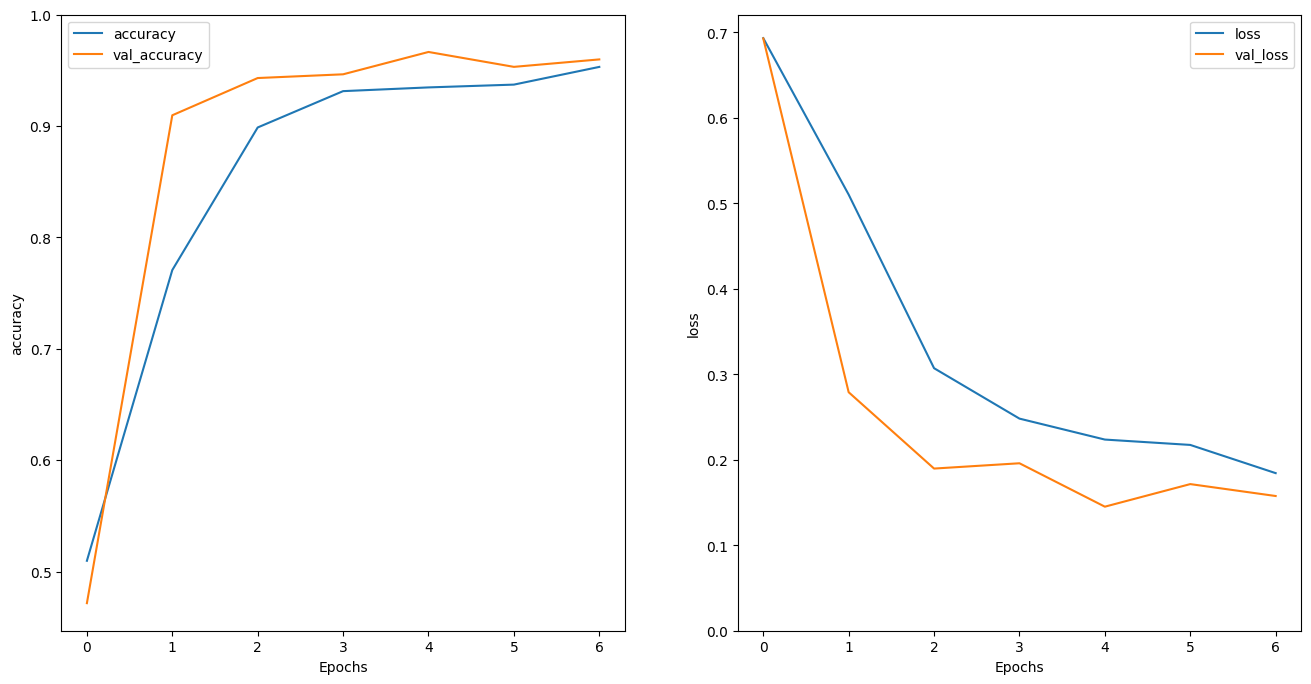

In [44]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

## Avaliação do Modelo

Avalia o desempenho do modelo no conjunto de teste.

In [45]:
test_loss, test_acc = model.evaluate(testing_padded, y_test)
print(f"LSTM model loss: {test_loss} " )
print(f"LSTM model accuracy: {test_acc*100:0.2f}%" )

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9672 - loss: 0.1346
LSTM model loss: 0.15759341418743134 
LSTM model accuracy: 95.99%


## Predição

Prediz a saída de novas mensagens

In [46]:
predict_msg = ["Have friends and colleagues who could benefit from these weekly updates? Send them to this link to subscribe",
               "Call me"]

In [47]:
def predict_spam(predict_msg):
  new_seq = tokenizer.texts_to_sequences(predict_msg)
  padded = pad_sequences(new_seq,
                         maxlen = max_len,
                         padding = padding_type,
                         truncating = trunc_type)
  return(model.predict(padded))

In [48]:
# 'ham' se predict < 0.5 senão 'spam'
predict_spam(predict_msg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


array([[0.9702451 ],
       [0.03105786]], dtype=float32)

## Desafio 1

Modifique a configuração do modelo de classificação de forma a usar três camadas de LSTM Bidirecional, em vez de apenas uma, como foi feito do código acima.

Você vai precisar replicar todas as células do notebook, desde a Configuração do Modelo de Classificação, fazendo as devidas adaptações para a nova configuração.

A saída esperada para o model.sumary() da nova arquitetura é:

Adicione abaixo a nova sequência de código.

In [49]:
### INICIE O CÓDIGO AQUI ### (várias linhas de código / várias células)
# modelo Bidirectional LSTM
model_bilstm = Sequential()
model_bilstm.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model_bilstm.add(SpatialDropout1D(0.2))
model_bilstm.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model_bilstm.add(Dense(1, activation='sigmoid'))

# Compila o modelo
model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Configuração do Modelo de Classificação

In [52]:
# Defina o callback de early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)



#### Treinamento do Modelo

In [53]:
# Treine o modelo
history_bilstm = model_bilstm.fit(
    training_padded, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.9848 - loss: 0.0578 - val_accuracy: 0.9456 - val_loss: 0.1825
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.9723 - loss: 0.0719 - val_accuracy: 0.9498 - val_loss: 0.1743
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9753 - loss: 0.0648 - val_accuracy: 0.9456 - val_loss: 0.1904
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9873 - loss: 0.0422 - val_accuracy: 0.9498 - val_loss: 0.1796
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9919 - loss: 0.0355 - val_accuracy: 0.9582 - val_loss: 0.1855


#### Avaliação do Modelo

In [54]:
test_loss_bilstm, test_acc_bilstm = model_bilstm.evaluate(testing_padded, y_test)
print(f"BiLSTM model loss: {test_loss_bilstm}")
print(f"BiLSTM model accuracy: {test_acc_bilstm*100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9747 - loss: 0.0727
BiLSTM model loss: 0.07931291311979294
BiLSTM model accuracy: 96.99%


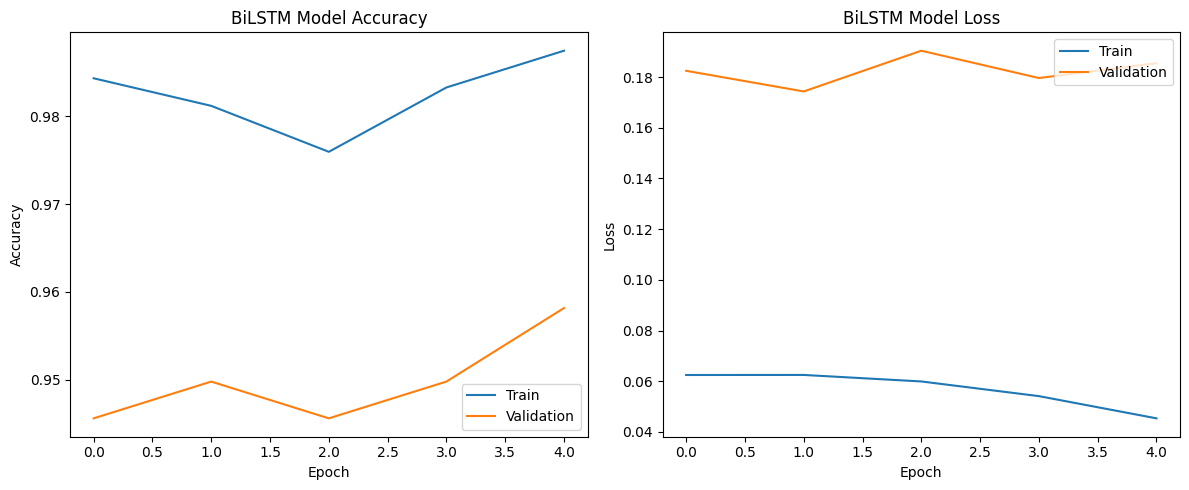

In [55]:
# Visualizar o histórico de treinamento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['accuracy'])
plt.plot(history_bilstm.history['val_accuracy'])
plt.title('BiLSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['loss'])
plt.plot(history_bilstm.history['val_loss'])
plt.title('BiLSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

#### Predição

In [58]:
def predict_spam_bilstm(predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq,
                          maxlen=max_len,
                          padding=padding_type,
                          truncating=trunc_type)
    return model_bilstm.predict(padded)

predict_spam_bilstm(predict_msg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


array([[0.9739841 ],
       [0.02250454]], dtype=float32)

In [ ]:
### TERMINE O CÓDIGO AQUI ###

## Desafio 2

Modifique a configuração do modelo de classificação de forma a usar uma Gated Recurrent Unit (GRU) Bidirecional, em vez de uma LSTM.

Você vai precisar replicar todas as células do notebook, desde a Configuração do Modelo de Classificação, fazendo as devidas adaptações para a nova configuração.

A saída esperada para o model.sumary() da nova arquitetura é:

Adicione abaixo a nova sequência de código.

In [ ]:
### INICIE O CÓDIGO AQUI ### (várias linhas de código / várias células)

#### Configuração do Modelo de Classificação

In [61]:
model_gru = Sequential()
model_gru.add(Embedding(vocab_size, 16, input_length=max_len))
model_gru.add(SpatialDropout1D(0.2))
model_gru.add(GRU(128, return_sequences=True))
model_gru.add(GRU(128, return_sequences=True))
model_gru.add(GRU(128))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])


model_gru.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_8                  │ ?                           │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_8 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### Treinamento do Modelo

In [62]:
history_gru = model_gru.fit(
    training_padded, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 267ms/step - accuracy: 0.4892 - loss: 0.6947 - val_accuracy: 0.4854 - val_loss: 0.6941
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 218ms/step - accuracy: 0.4780 - loss: 0.6959 - val_accuracy: 0.5230 - val_loss: 0.6931
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.4949 - loss: 0.6942 - val_accuracy: 0.5146 - val_loss: 0.6927
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.5252 - loss: 0.6916 - val_accuracy: 0.4854 - val_loss: 0.6935
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step - accuracy: 0.4919 - loss: 0.6944 - val_accuracy: 0.4854 - val_loss: 0.6932
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 240ms/step - accuracy: 0.5028 - loss: 0.6951 - val_accuracy: 0.5146 - val_loss: 0.6932


#### Avaliação do Modelo

In [63]:
test_loss_gru, test_acc_gru = model_gru.evaluate(testing_padded, y_test)
print(f"GRU model loss: {test_loss_gru}")
print(f"GRU model accuracy: {test_acc_gru*100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4340 - loss: 0.6937
GRU model loss: 0.6934186816215515
GRU model accuracy: 47.16%


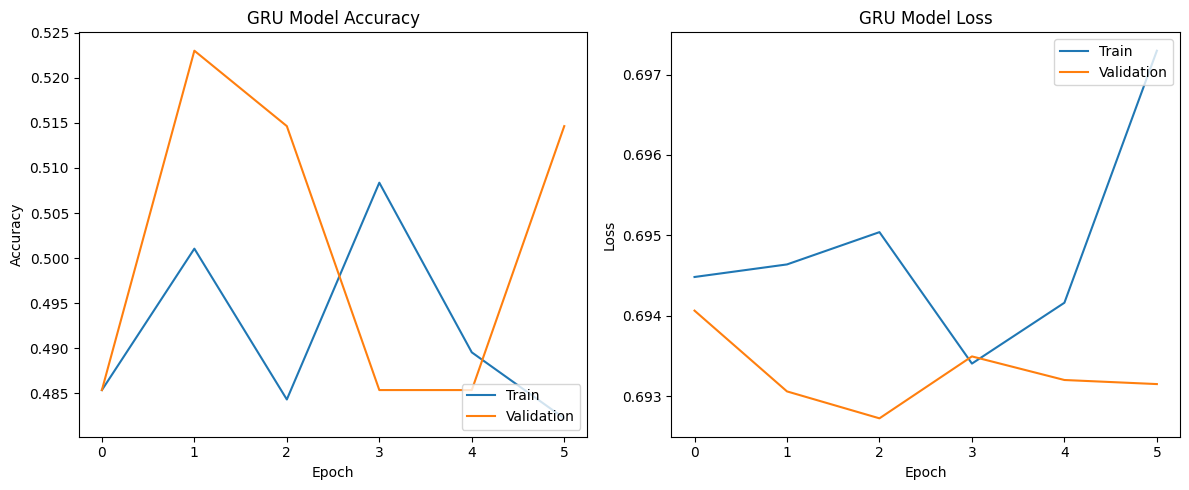

In [64]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('GRU Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

#### Predição

In [66]:
def predict_spam_gru(predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq,
                          maxlen=max_len,
                          padding=padding_type,
                          truncating=trunc_type)
    return model_gru.predict(padded)


result_gru = predict_spam_gru(predict_msg)
print("Prediction results from GRU model:")
for i, msg in enumerate(predict_msg):
    prediction = "SPAM" if result_gru[i][0] > 0.5 else "HAM"
    print(f"Message: {msg}")
    print(f"Prediction: {prediction} (Score: {result_gru[i][0]:.4f})")
    print("-" * 50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
Prediction results from GRU model:
Message: Have friends and colleagues who could benefit from these weekly updates? Send them to this link to subscribe
Prediction: SPAM (Score: 0.5017)
--------------------------------------------------
Message: Call me
Prediction: SPAM (Score: 0.5017)
--------------------------------------------------


In [ ]:
### TERMINE O CÓDIGO AQUI ###

## Comparação dos Resultados

Adicione abaixo uma tabela com a comparação dos resultados obtidos pelas três configurações efetuadas neste notebook.<br>
Qual configuração obteve o melhor resultados?

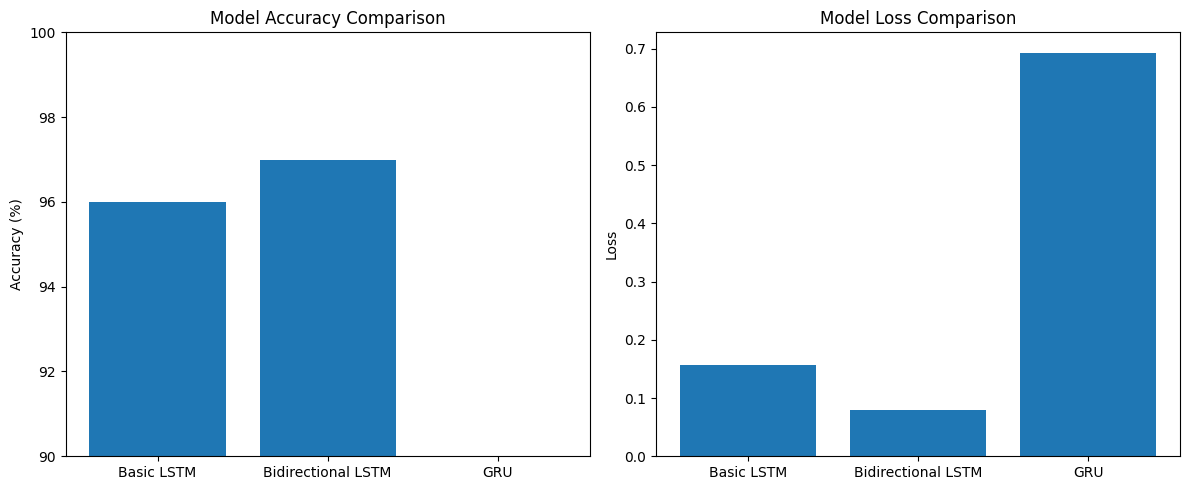

In [65]:
models = ['Basic LSTM', 'Bidirectional LSTM', 'GRU']
accuracy = [test_acc*100, test_acc_bilstm*100, test_acc_gru*100]
loss = [test_loss, test_loss_bilstm, test_loss_gru]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(models, accuracy)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim([90, 100])

plt.subplot(1, 2, 2)
plt.bar(models, loss)
plt.title('Model Loss Comparison')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Fim

Parabéns! Você efetuou todos os passos para criar modelos baseados em Redes Neurais Recorrentes para a tarefa de classificação de textos.

-------------------------------------------